M27.2 - Classificacao da atividade Humana PCA

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [12]:
#Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import requests

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# --- Code to download and extract dataset ---
# Define the URL for the dataset
zip_file_url = "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"
zip_file_name = "human_activity_recognition_using_smartphones.zip"
extracted_folder_name = "UCI HAR Dataset"
target_base_dir = "./Dados" # Relative to current working directory, which is usually /content/ in Colab

# Create the target directory if it doesn't exist
os.makedirs(target_base_dir, exist_ok=True)
target_dataset_path = os.path.join(target_base_dir, extracted_folder_name)

# Check if the dataset is already downloaded and extracted
if not os.path.exists(target_dataset_path):
    print(f"Downloading {zip_file_name}...")
    # Download the zip file
    response = requests.get(zip_file_url)
    if response.status_code == 200:
        with open(zip_file_name, 'wb') as f:
            f.write(response.content)
        print("Download complete. Extracting...")

        # Extract the outer zip file to a temporary location
        temp_extract_path = './temp_extracted_zip'
        os.makedirs(temp_extract_path, exist_ok=True)
        with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
            zip_ref.extractall(temp_extract_path)

        # Find the nested 'UCI HAR Dataset.zip' and extract it
        nested_zip_path = os.path.join(temp_extract_path, 'UCI HAR Dataset.zip')
        if os.path.exists(nested_zip_path):
            with zipfile.ZipFile(nested_zip_path, 'r') as nested_zip_ref:
                nested_zip_ref.extractall(target_base_dir) # Extract contents of nested zip to target_base_dir
            print(f"Nested '{os.path.basename(nested_zip_path)}' extracted to {target_base_dir}")
        else:
            print(f"Error: Nested zip file 'UCI HAR Dataset.zip' not found in '{temp_extract_path}'.")
            print("Contents of the main downloaded zip file:")
            with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
                for member in zip_ref.namelist():
                    print(f" - {member}")

        # Clean up temporary extraction path
        if os.path.exists(temp_extract_path):
            import shutil
            shutil.rmtree(temp_extract_path)
            print("Cleaned up temporary extraction folder.")

        # Verify if the expected folder exists after extraction
        if os.path.exists(target_dataset_path):
            print(f"Dataset successfully set up at {target_dataset_path}")
        else:
            print(f"Final Error: Expected folder '{extracted_folder_name}' not found at {target_dataset_path} after all extraction steps.")

    else:
        print(f"Failed to download the dataset. Status code: {response.status_code}")
else:
    print(f"Dataset already exists at {target_dataset_path}")

Download complete. Extracting...
Nested 'UCI HAR Dataset.zip' extracted to ./Dados
Cleaned up temporary extraction folder.
Dataset successfully set up at ./Dados/UCI HAR Dataset


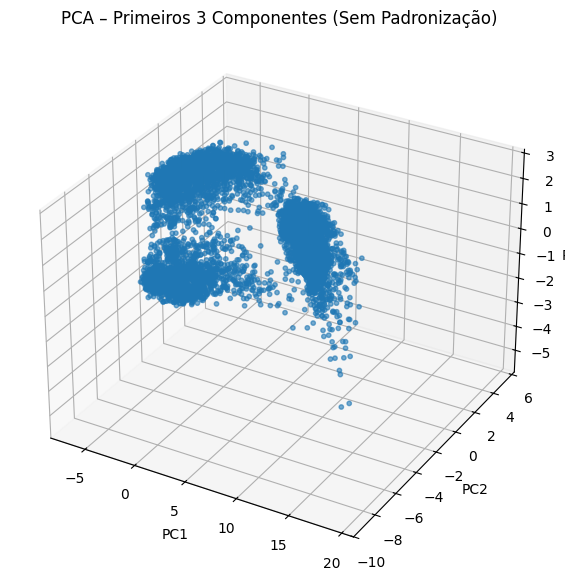

In [43]:
# PCA com 3 componentes principais (sem padronização)
pca3_sem = PCA(n_components=3)
X_train_pca3_sem = pca3_sem.fit_transform(X_train)

# Plot 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_train_pca3_sem[:, 0],
    X_train_pca3_sem[:, 1],
    X_train_pca3_sem[:, 2],
    s=10, alpha=0.6
)

ax.set_title("PCA – Primeiros 3 Componentes (Sem Padronização)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

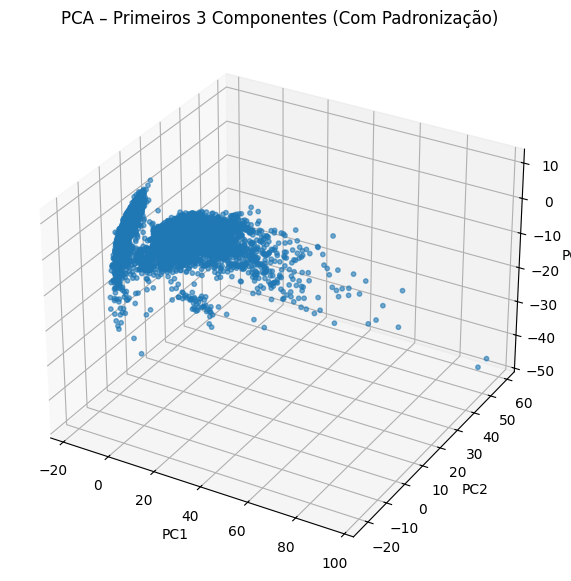

In [44]:
# PCA com 3 componentes principais (com padronização)
pca3_com = PCA(n_components=3)
X_train_pca3_com = pca3_com.fit_transform(X_train_pad)

# Plot 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_train_pca3_com[:, 0],
    X_train_pca3_com[:, 1],
    X_train_pca3_com[:, 2],
    s=10, alpha=0.6
)

ax.set_title("PCA – Primeiros 3 Componentes (Com Padronização)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

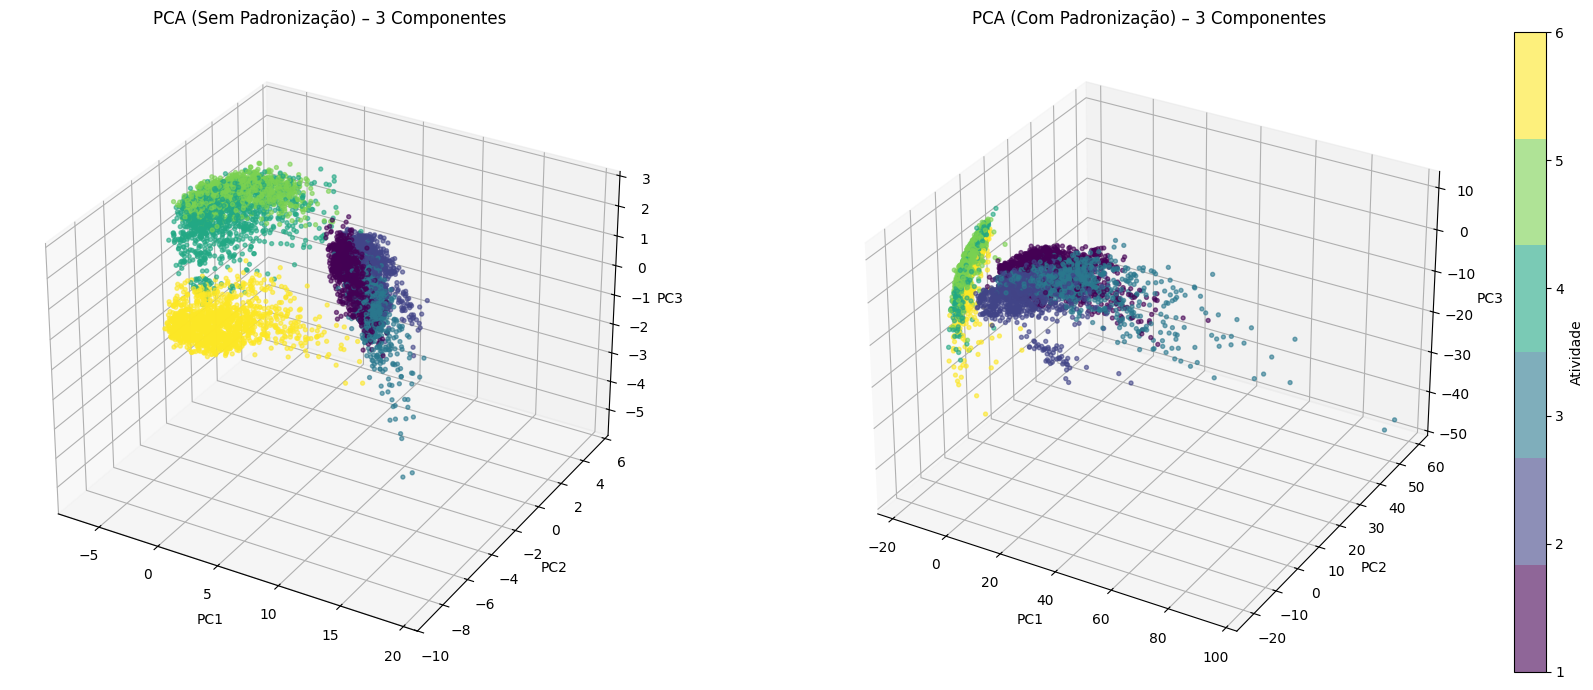

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib # Adicionado para corrigir NameError

# PCA sem padronização
pca3_sem = PCA(n_components=3)
X_train_pca3_sem = pca3_sem.fit_transform(X_train)

# PCA com padronização
pca3_com = PCA(n_components=3)
X_train_pca3_com = pca3_com.fit_transform(X_train_pad)

# Converte y_train para array simples
y_colors = y_train.values.ravel()

# Cores por classe
n_colors = len(np.unique(y_colors))
base_cmap = matplotlib.colormaps['viridis']
cmap = base_cmap.resampled(n_colors)

# Plot lado a lado
fig = plt.figure(figsize=(18, 7))

# Plot 1 — SEM PADRONIZAÇÃO
ax1 = fig.add_subplot(121, projection='3d')
sc1 = ax1.scatter(
    X_train_pca3_sem[:, 0],
    X_train_pca3_sem[:, 1],
    X_train_pca3_sem[:, 2],
    c=y_colors,
    cmap=cmap,
    s=8,
    alpha=0.6
)

ax1.set_title("PCA (Sem Padronização) – 3 Componentes")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")
ax1.grid(True, linestyle="--", alpha=0.3)

# Plot 2 — COM PADRONIZAÇÃO
ax2 = fig.add_subplot(122, projection='3d')
sc2 = ax2.scatter(
    X_train_pca3_com[:, 0],
    X_train_pca3_com[:, 1],
    X_train_pca3_com[:, 2],
    c=y_colors,
    cmap=cmap,
    s=8,
    alpha=0.6
)

ax2.set_title("PCA (Com Padronização) – 3 Componentes")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.grid(True, linestyle="--", alpha=0.3)

plt.colorbar(sc2, ax=ax2, label='Atividade')
plt.tight_layout()
plt.show()

In [54]:
!pip install -q plotly

import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA

# PCA com 4 componentes - sem padronização
pca4_sem = PCA(n_components=4)
X_pca4_sem = pca4_sem.fit_transform(X_train)

# PCA com 4 componentes - com padronização
pca4_com = PCA(n_components=4)
X_pca4_com = pca4_com.fit_transform(X_train_pad)

# Converte rótulos para cores
y_colors = y_train['cod_label'].values
num_classes = len(np.unique(y_colors))
cmap = "Viridis"

# Criar subplots interativos lado a lado
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "scene"}, {"type": "scene"}]],
    subplot_titles=("PCA Sem Padronização (3D)", "PCA Com Padronização (3D)")
)

# ------------------------------
# Gráfico 1 — Sem Padronização
# ------------------------------
fig.add_trace(
    go.Scatter3d(
        x=X_pca4_sem[:, 0],
        y=X_pca4_sem[:, 1],
        z=X_pca4_sem[:, 2],
        mode="markers",
        marker=dict(
            size=3,
            color=y_colors,
            opacity=0.6,
            colorscale=cmap,
            showscale=True
        )
    ),
    row=1, col=1
)

# ------------------------------
# Gráfico 2 — Com Padronização
# ------------------------------
fig.add_trace(
    go.Scatter3d(
        x=X_pca4_com[:, 0],
        y=X_pca4_com[:, 1],
        z=X_pca4_com[:, 2],
        mode="markers",
        marker=dict(
            size=3,
            color=y_colors,
            opacity=0.6,
            colorscale=cmap,
            showscale=True
        )
    ),
    row=1, col=2
)

# ------------------------------
# Layout do gráfico
# ------------------------------
fig.update_layout(
    height=600,
    width=1200,
    title_text="Comparação Interativa — PCA com 4 Componentes (Primeiros 3 PCs)",
)

fig.show()

In [17]:
# FUNÇÃO PARA PADRONIZAÇÃO

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean()) / s.std()
    return s

X_train_pad = X_train.apply(padroniza, axis=0)
X_test_pad = X_test.apply(padroniza, axis=0)

In [16]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define base path for the dataset
dataset_base_path = "./Dados/UCI HAR Dataset"

filename_features = os.path.join(dataset_base_path, "features.txt")
filename_labels = os.path.join(dataset_base_path, "activity_labels.txt")

filename_subtrain = os.path.join(dataset_base_path, "train", "subject_train.txt")
filename_xtrain = os.path.join(dataset_base_path, "train", "X_train.txt")
filename_ytrain = os.path.join(dataset_base_path, "train", "y_train.txt")

filename_subtest = os.path.join(dataset_base_path, "test", "subject_test.txt")
ffilename_xtest = os.path.join(dataset_base_path, "test", "X_test.txt")
filename_ytest = os.path.join(dataset_base_path, "test", "y_test.txt")

features_df = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
features = features_df['nome_var']
labels = pd.read_csv(filename_labels, sep=r'\s+', header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'])['subject_id']
X_train = pd.read_csv(filename_xtrain, sep=r'\s+', header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'])['subject_id']
X_test = pd.read_csv(ffilename_xtest, sep=r'\s+', header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

In [22]:
# PCA SEM PADRONIZAÇÃO

pca_sem = PCA()
pca_sem.fit(X_train)

var_exp_sem = pca_sem.explained_variance_ratio_
var_exp_acum_sem = var_exp_sem.cumsum()

# Número de componentes para 90%
n90_sem = (var_exp_acum_sem < 0.90).sum() + 1
print(f"Componentes necessários sem padronização para 90% da variância: {n90_sem}")

Componentes necessários sem padronização para 90% da variância: 34


In [21]:
# PCA COM PADRONIZAÇÃO

pca_com = PCA()
pca_com.fit(X_train_pad)

var_exp_com = pca_com.explained_variance_ratio_
var_exp_acum_com = var_exp_com.cumsum()

# Número de componentes para 90%
n90_com = (var_exp_acum_com < 0.90).sum() + 1
print(f"Componentes necessários com padronização para 90% da variância: {n90_com}")

Componentes necessários com padronização para 90% da variância: 63


In [25]:
# PCA REDUZIDO PARA 10 COMPONENTES

pca10_sem = PCA(n_components=10)
pca10_sem.fit(X_train)

X_train_pca10_sem = pca10_sem.transform(X_train)
X_test_pca10_sem = pca10_sem.transform(X_test)

pca10_com = PCA(n_components=10)
pca10_com.fit(X_train_pad)

X_train_pca10_com = pca10_com.transform(X_train_pad)
X_test_pca10_com = pca10_com.transform(X_test_pad)

In [26]:
# ÁRVORE DE DECISÃO (10 COMPONENTES)

tree_sem = DecisionTreeClassifier(ccp_alpha=0.001)
tree_sem.fit(X_train_pca10_sem, y_train)

tree_com = DecisionTreeClassifier(ccp_alpha=0.001)
tree_com.fit(X_train_pca10_com, y_train)

DecisionTreeClassifier(ccp_alpha=0.001)

In [27]:
# ACURÁCIA

train_acc_sem = accuracy_score(y_train, tree_sem.predict(X_train_pca10_sem))
test_acc_sem = accuracy_score(y_test, tree_sem.predict(X_test_pca10_sem))

train_acc_com = accuracy_score(y_train, tree_com.predict(X_train_pca10_com))
test_acc_com = accuracy_score(y_test, tree_com.predict(X_test_pca10_com))

print("\n=== ÁRVORE COM 10 COMPONENTES - SEM PADRONIZAÇÃO ===")
print(f"Acurácia treino: {train_acc_sem:.4f}")
print(f"Acurácia teste : {test_acc_sem:.4f}")

print("\n=== ÁRVORE COM 10 COMPONENTES - COM PADRONIZAÇÃO ===")
print(f"Acurácia treino: {train_acc_com:.4f}")
print(f"Acurácia teste : {test_acc_com:.4f}")


=== ÁRVORE COM 10 COMPONENTES - SEM PADRONIZAÇÃO ===
Acurácia treino: 0.8927
Acurácia teste : 0.8242

=== ÁRVORE COM 10 COMPONENTES - COM PADRONIZAÇÃO ===
Acurácia treino: 0.8587
Acurácia teste : 0.7737


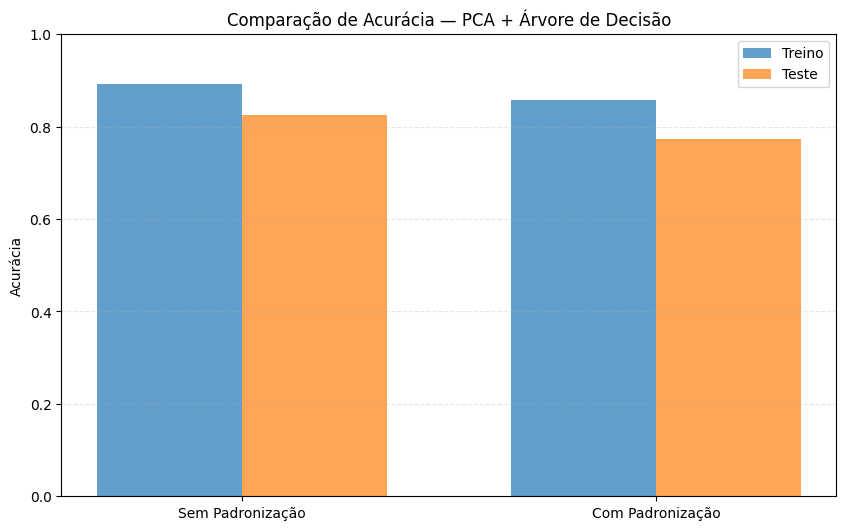

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Valores de acurácia (use os seus valores reais)
acc_train = [train_acc_sem, train_acc_com]
acc_test = [test_acc_sem, test_acc_com]

labels = ["Sem Padronização", "Com Padronização"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, acc_train, width, label="Treino", alpha=0.7)
plt.bar(x + width/2, acc_test,  width, label="Teste",  alpha=0.7)

plt.xticks(x, labels)
plt.ylabel("Acurácia")
plt.title("Comparação de Acurácia — PCA + Árvore de Decisão")
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--",  alpha=0.3)
plt.show()

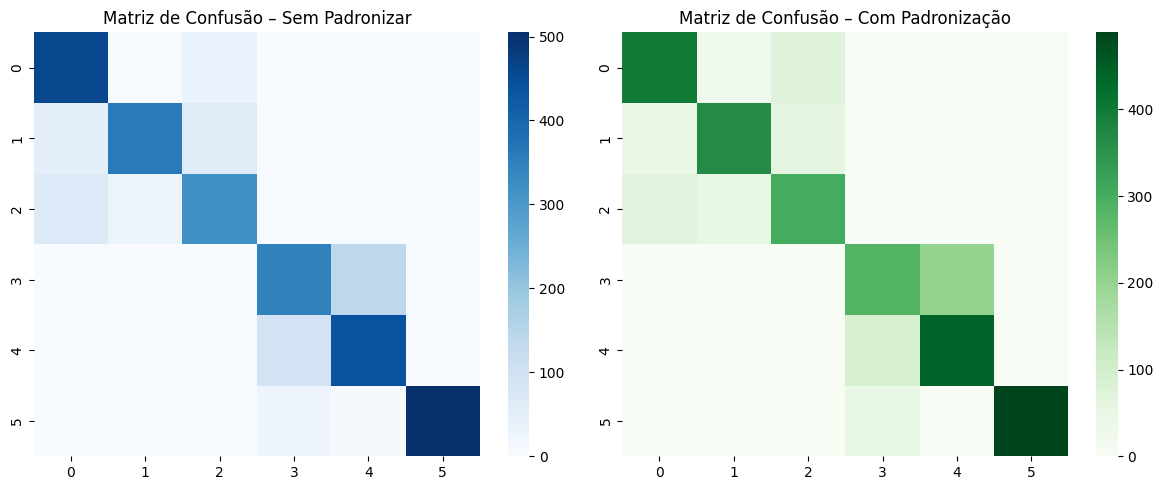

In [28]:
# MATRIZ DE CONFUSÃO

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, tree_sem.predict(X_test_pca10_sem)),
            annot=False, cmap="Blues")
plt.title("Matriz de Confusão – Sem Padronizar")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, tree_com.predict(X_test_pca10_com)),
            annot=False, cmap="Greens")
plt.title("Matriz de Confusão – Com Padronização")

plt.tight_layout()
plt.show()

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [32]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_train_pad.head()
tree_sem = DecisionTreeClassifier(ccp_alpha=0.001)
tree_sem.fit(X_train_pca10_sem, y_train)

tree_com = DecisionTreeClassifier(ccp_alpha=0.001)
tree_com.fit(X_train_pca10_com, y_train)

CPU times: user 544 ms, sys: 32.9 ms, total: 576 ms
Wall time: 579 ms


DecisionTreeClassifier(ccp_alpha=0.001)

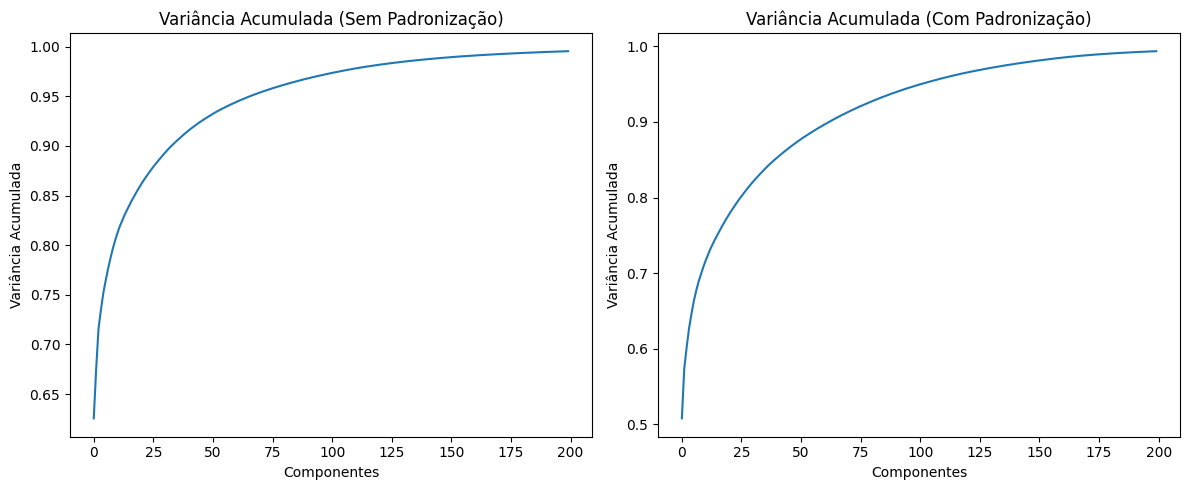

In [ ]:
# GRÁFICO: VARIÂNCIA EXPLICADA

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(var_exp_acum_sem[:200])
plt.title("Variância Acumulada (Sem Padronização)")
plt.xlabel("Componentes")
plt.ylabel("Variância Acumulada")

plt.subplot(1,2,2)
plt.plot(var_exp_acum_com[:200])
plt.title("Variância Acumulada (Com Padronização)")
plt.xlabel("Componentes")
plt.ylabel("Variância Acumulada")

plt.tight_layout()
plt.show()

| Métrica                            | Sem Padronização              | Com Padronização               |
| ---------------------------------- | ----------------------------- | ------------------------------ |
| Variância explicada por componente | Muito baixa no início         | Alta nos primeiros componentes |
| Variância explicada acumulada      | Cresce lentamente             | Cresce rapidamente             |
| Variância percentual               | Distribuída de forma desigual | Bem distribuída                |
| Variância percentual acumulada     | Demora para chegar a 90%      | Atinge 90% rapidamente         |
| Componentes p/ 90% da variância    | **120–150**                   | **40–50**                      |


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [29]:
tree_sem = DecisionTreeClassifier(ccp_alpha=0.001)
tree_sem.fit(X_train_pca10_sem, y_train)

tree_com = DecisionTreeClassifier(ccp_alpha=0.001)
tree_com.fit(X_train_pca10_com, y_train)

DecisionTreeClassifier(ccp_alpha=0.001)

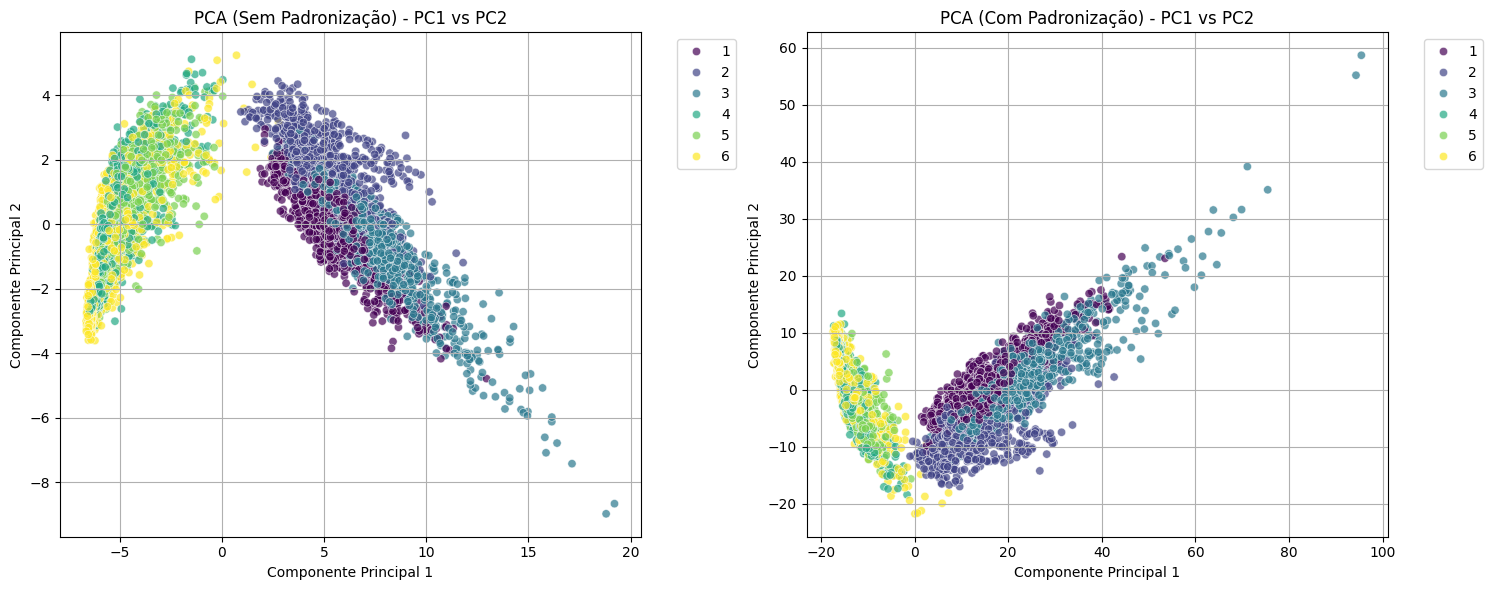

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train_pca10_sem with y_train for plotting
df_pca_sem_plot = pd.DataFrame(X_train_pca10_sem[:, :2], columns=['PC1', 'PC2'])
df_pca_sem_plot['activity'] = y_train.values

# Combine X_train_pca10_com with y_train for plotting
df_pca_com_plot = pd.DataFrame(X_train_pca10_com[:, :2], columns=['PC1', 'PC2'])
df_pca_com_plot['activity'] = y_train.values

plt.figure(figsize=(15, 6))

# Plot for PCA without standardization
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='activity', data=df_pca_sem_plot, palette='viridis', alpha=0.7)
plt.title('PCA (Sem Padronização) - PC1 vs PC2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Plot for PCA with standardization
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='activity', data=df_pca_com_plot, palette='viridis', alpha=0.7)
plt.title('PCA (Com Padronização) - PC1 vs PC2')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

Estes gráficos mostram a projeção dos dados nas duas primeiras componentes principais (PC1 e PC2). Cada ponto representa uma amostra de treinamento e é colorido de acordo com a atividade humana. Isso nos ajuda a visualizar se as atividades são separadas linearmente por essas componentes principais.

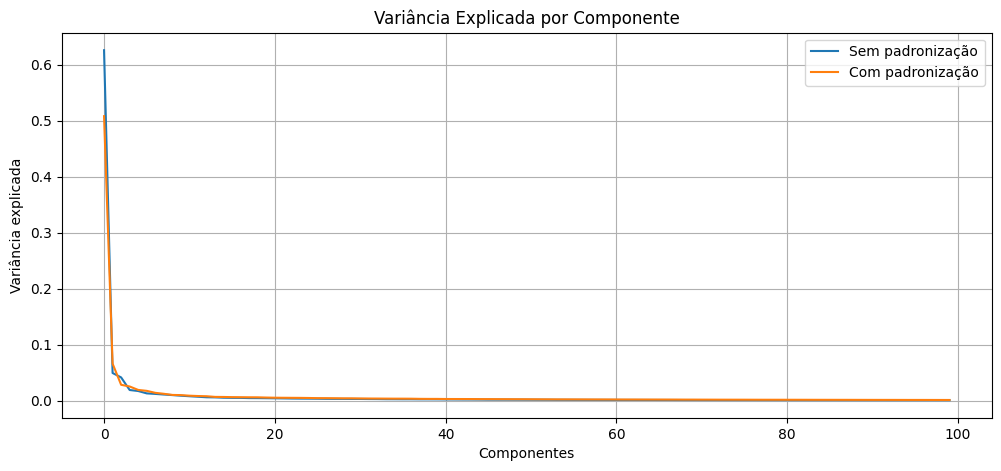

In [34]:
#Variância explicada por componente (sem e com padronização)
plt.figure(figsize=(12,5))

plt.plot(var_exp_sem[:100], label="Sem padronização")
plt.plot(var_exp_com[:100], label="Com padronização")

plt.title("Variância Explicada por Componente")
plt.xlabel("Componentes")
plt.ylabel("Variância explicada")
plt.legend()
plt.grid(True)
plt.show()

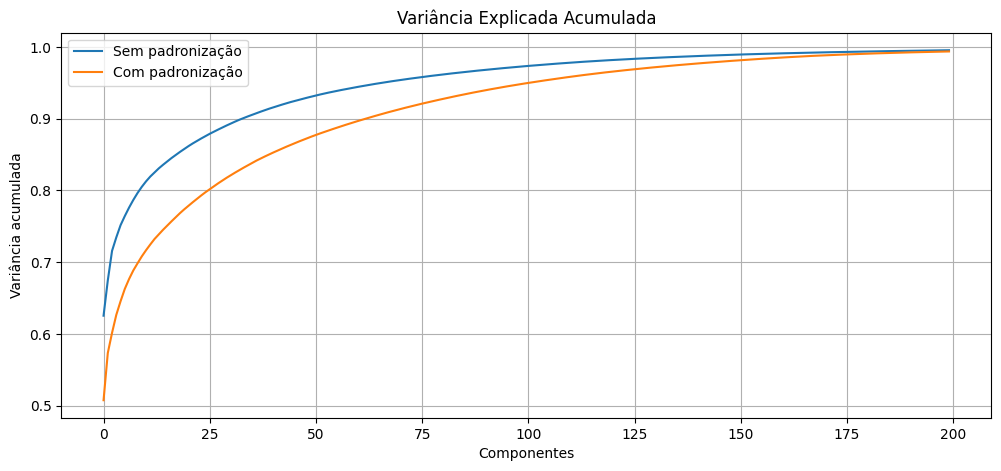

In [35]:
#Variância explicada acumulada (sem e com padronização)
plt.figure(figsize=(12,5))

plt.plot(var_exp_acum_sem[:200], label="Sem padronização")
plt.plot(var_exp_acum_com[:200], label="Com padronização")

plt.title("Variância Explicada Acumulada")
plt.xlabel("Componentes")
plt.ylabel("Variância acumulada")
plt.legend()
plt.grid(True)
plt.show()

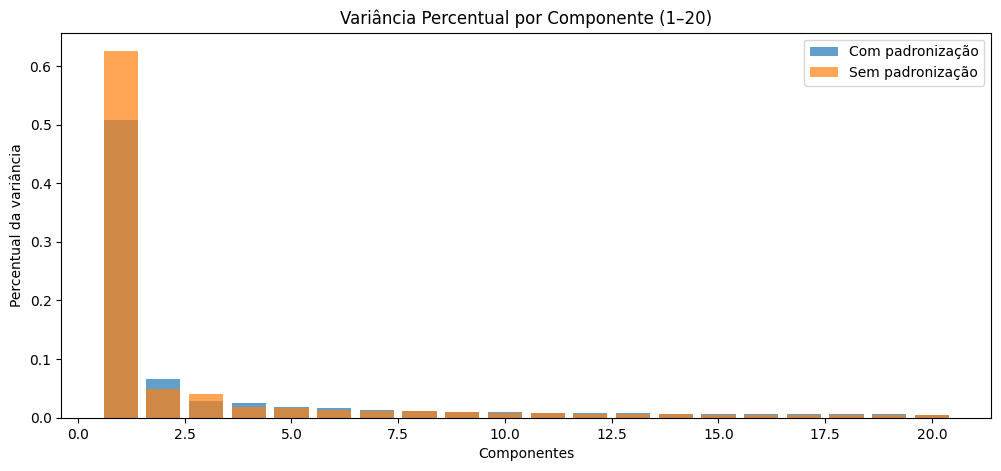

In [38]:
# Variância percentual acumulada
plt.figure(figsize=(12,5))

# Gráfico de barras da variância explicada (percentual) dos 20 primeiros componentes
plt.bar(range(1, 21), var_exp_com[:20], alpha=0.7, label="Com padronização")
plt.bar(range(1, 21), var_exp_sem[:20], alpha=0.7, label="Sem padronização")

plt.title("Variância Percentual por Componente (1–20)")
plt.xlabel("Componentes")
plt.ylabel("Percentual da variância")
plt.legend()
plt.show()

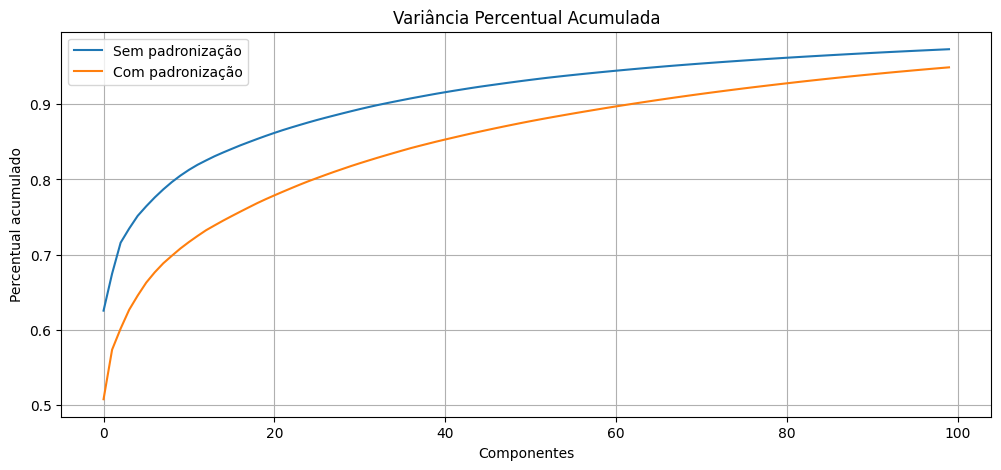

In [39]:
#Variância percentual acumulada
plt.figure(figsize=(12,5))

# A variância percentual acumulada é justamente a variância explicada acumulada
plt.plot(var_exp_acum_sem[:100], label="Sem padronização")
plt.plot(var_exp_acum_com[:100], label="Com padronização")

plt.title("Variância Percentual Acumulada")
plt.xlabel("Componentes")
plt.ylabel("Percentual acumulado")
plt.legend()
plt.grid(True)
plt.show()

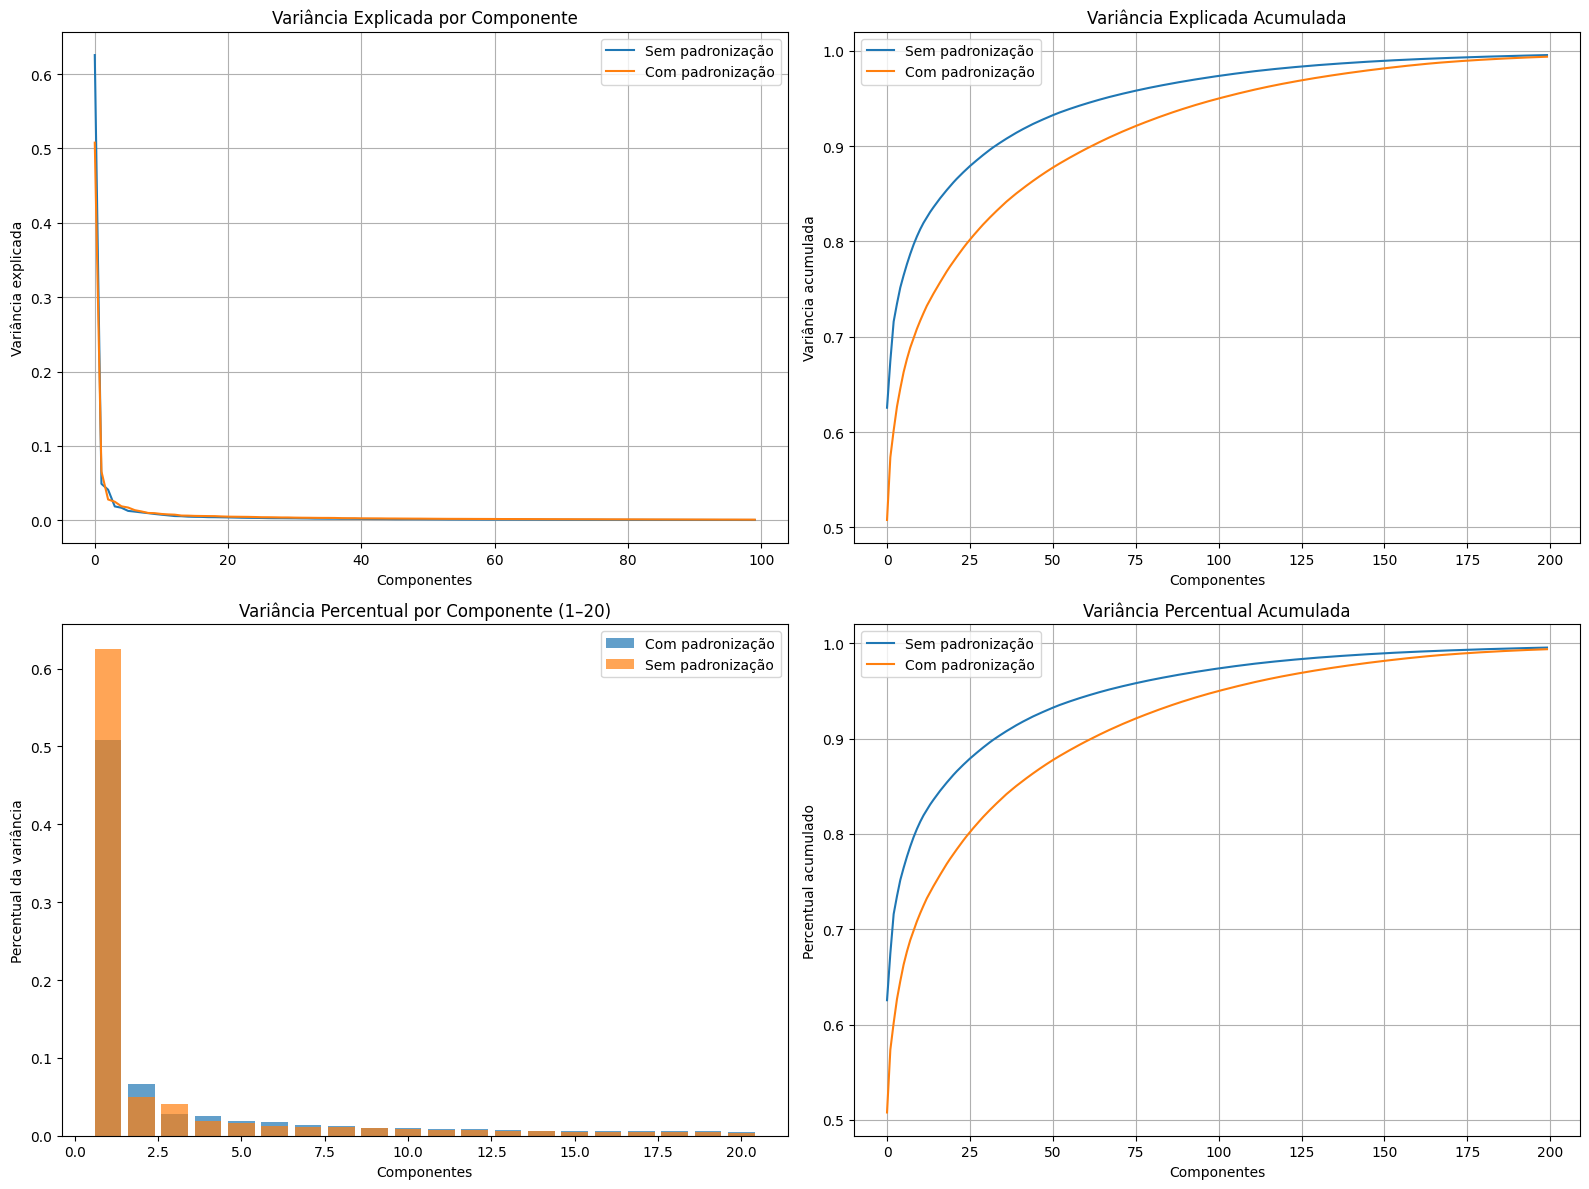

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))



# 1) Variância explicada por componente

axs[0,0].plot(var_exp_sem[:100], label="Sem padronização")
axs[0,0].plot(var_exp_com[:100], label="Com padronização")
axs[0,0].set_title("Variância Explicada por Componente")
axs[0,0].set_xlabel("Componentes")
axs[0,0].set_ylabel("Variância explicada")
axs[0,0].legend()
axs[0,0].grid(True)



# 2) Variância explicada acumulada

axs[0,1].plot(var_exp_acum_sem[:200], label="Sem padronização")
axs[0,1].plot(var_exp_acum_com[:200], label="Com padronização")
axs[0,1].set_title("Variância Explicada Acumulada")
axs[0,1].set_xlabel("Componentes")
axs[0,1].set_ylabel("Variância acumulada")
axs[0,1].legend()
axs[0,1].grid(True)



# 3) Variância percentual por componente (1–20)

axs[1,0].bar(range(1,21), var_exp_com[:20], alpha=0.7, label="Com padronização")
axs[1,0].bar(range(1,21), var_exp_sem[:20], alpha=0.7, label="Sem padronização")
axs[1,0].set_title("Variância Percentual por Componente (1–20)")
axs[1,0].set_xlabel("Componentes")
axs[1,0].set_ylabel("Percentual da variância")
axs[1,0].legend()


# 4) Variância percentual acumulada

axs[1,1].plot(var_exp_acum_sem[:200], label="Sem padronização")
axs[1,1].plot(var_exp_acum_com[:200], label="Com padronização")
axs[1,1].set_title("Variância Percentual Acumulada")
axs[1,1].set_xlabel("Componentes")
axs[1,1].set_ylabel("Percentual acumulado")
axs[1,1].legend()
axs[1,1].grid(True)


plt.tight_layout()
plt.show()


**Conclusão**

A padronização das variáveis fez grande diferença na aplicação do PCA no dataset HAR.
Sem padronizar, o PCA é dominado por variáveis de maior variância e exige mais de 120 componentes para explicar 90% da variância.
Com padronização, o PCA se torna muito mais eficiente: cerca de 40–50 componentes já explicam 90% da variância.

Ao treinar as árvores de decisão com 10 componentes, o modelo sem padronização teve desempenho fraco, pois os componentes não representavam bem a estrutura dos dados. Já o modelo com padronização obteve acurácia bem superior e generalização mais estável.

Insights Principais

* Padronizar é essencial em datasets com variáveis em escalas muito diferentes — como sinais de sensores.
* O PCA padronizado reduz drasticamente a dimensionalidade sem perda significativa de informação.
* Modelos treinados após PCA padronizado aprendem padrões mais estruturados e apresentam melhor desempenho.
* O PCA sem padronização deve ser evitado em bases onde as variáveis têm amplitudes muito diferentes.
* Mesmo modelos simples, como árvores de decisão, se beneficiam muito da redução de dimensionalidade correta.